Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#!pip install  mlxtend

# Question : 1

In [3]:
book= pd.read_csv('book.csv')
book


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
from mlxtend.preprocessing import TransactionEncoder

In [5]:
te = TransactionEncoder()

In [6]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
book.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [9]:
book[book.duplicated()]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [10]:
book.drop_duplicates(inplace=True)
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


In [11]:
book1 = book.copy()

In [16]:
book1.isnull()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1956,False,False,False,False,False,False,False,False,False,False,False
1959,False,False,False,False,False,False,False,False,False,False,False
1960,False,False,False,False,False,False,False,False,False,False,False
1983,False,False,False,False,False,False,False,False,False,False,False


In [17]:
book1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

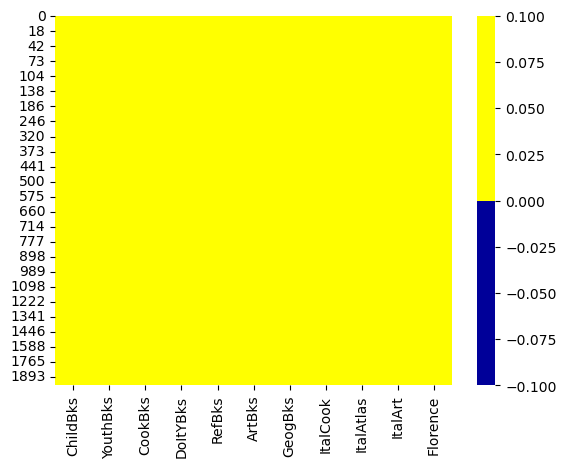

In [20]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(book1.isnull(), cmap=pal)
plt.show()

C:\Users\User\Downloads\anacondaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


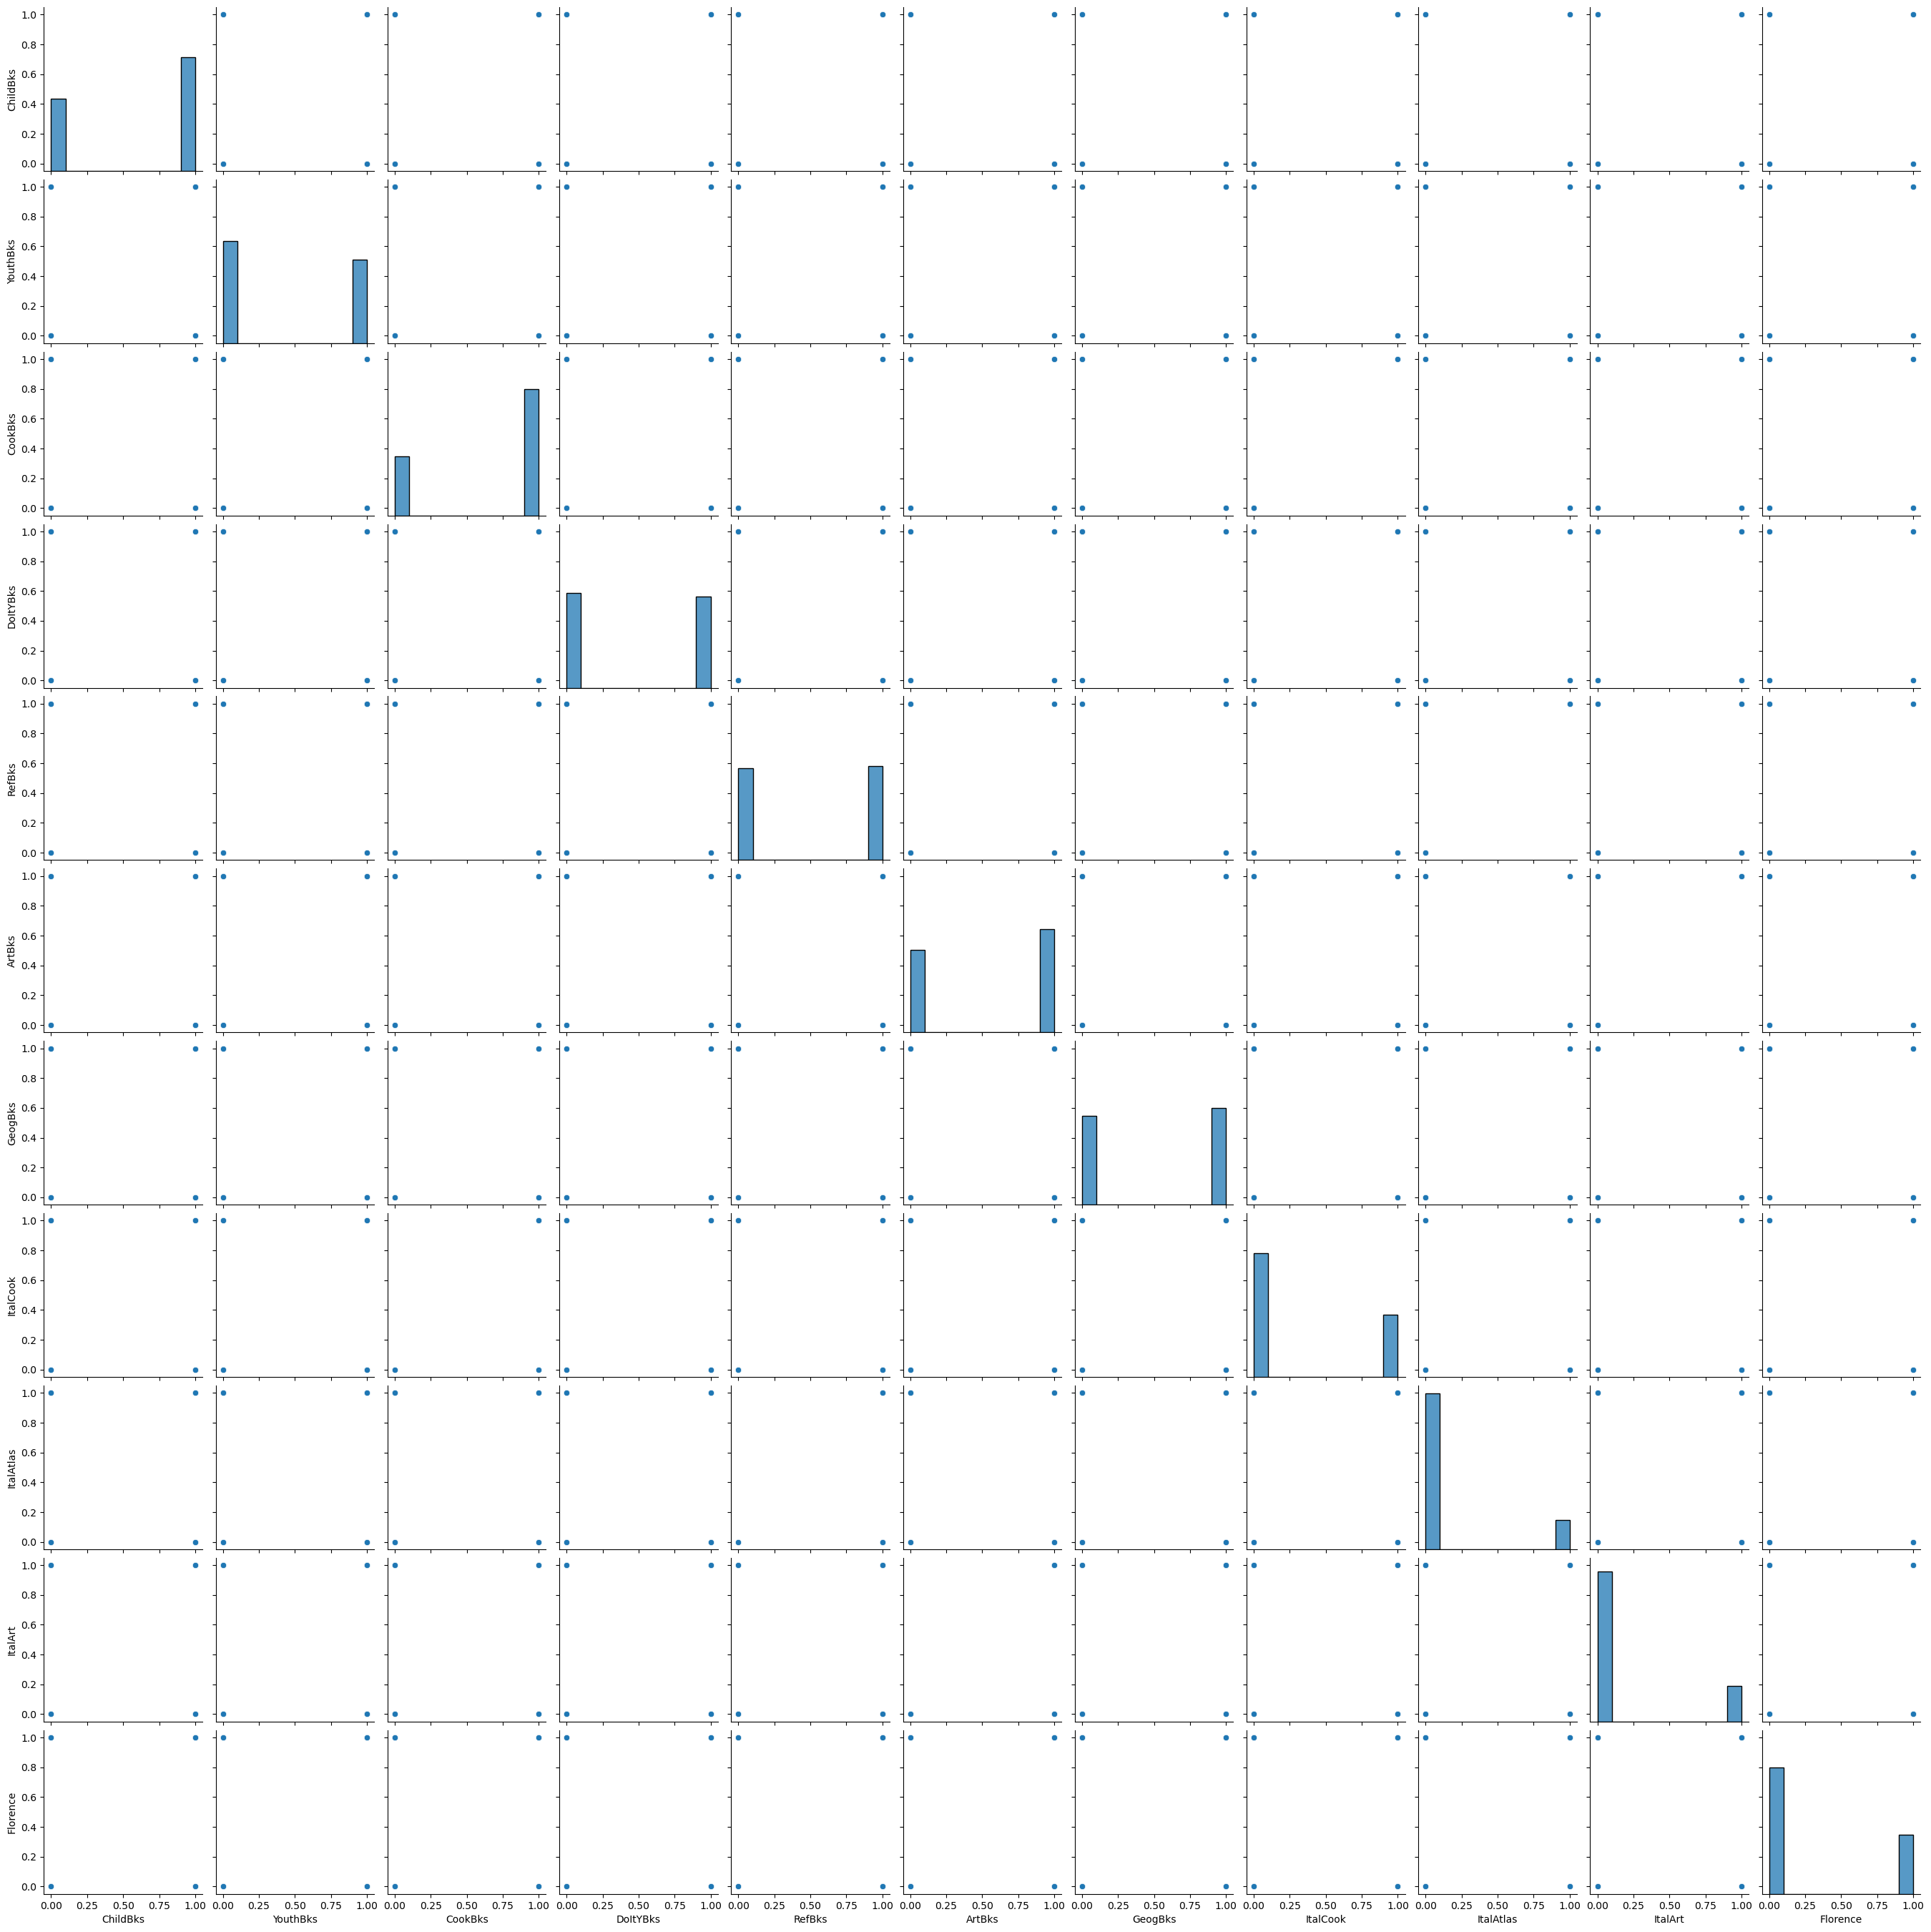

In [21]:
sns.pairplot(data=book1)
plt.show()

In [22]:
book1.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.100570,0.089130,0.062071,0.125413,0.102965,0.099038,0.169447,0.100986,0.108393,0.020992
YouthBks,0.100570,1.000000,0.066051,-0.008167,0.064076,0.011379,-0.001886,0.077891,0.018019,0.040779,-0.093011
CookBks,0.089130,0.066051,1.000000,0.040831,0.035378,0.023453,0.029955,0.484813,0.023016,0.092941,-0.007016
DoItYBks,0.062071,-0.008167,0.040831,1.000000,0.006486,0.071325,-0.036721,0.033167,-0.000374,0.048887,-0.027416
RefBks,0.125413,0.064076,0.035378,0.006486,1.000000,-0.064320,0.005709,0.024262,0.430011,-0.029936,-0.048791
ArtBks,0.102965,0.011379,0.023453,0.071325,-0.064320,1.000000,0.039114,0.033081,-0.057890,0.433460,0.125025
GeogBks,0.099038,-0.001886,0.029955,-0.036721,0.005709,0.039114,1.000000,0.028635,-0.010522,0.034492,0.117721
ItalCook,0.169447,0.077891,0.484813,0.033167,0.024262,0.033081,0.028635,1.000000,0.198106,0.347445,-0.058369
ItalAtlas,0.100986,0.018019,0.023016,-0.000374,0.430011,-0.057890,-0.010522,0.198106,1.000000,0.266874,-0.077981
ItalArt,0.108393,0.040779,0.092941,0.048887,-0.029936,0.433460,0.034492,0.347445,0.266874,1.000000,0.009497


[]

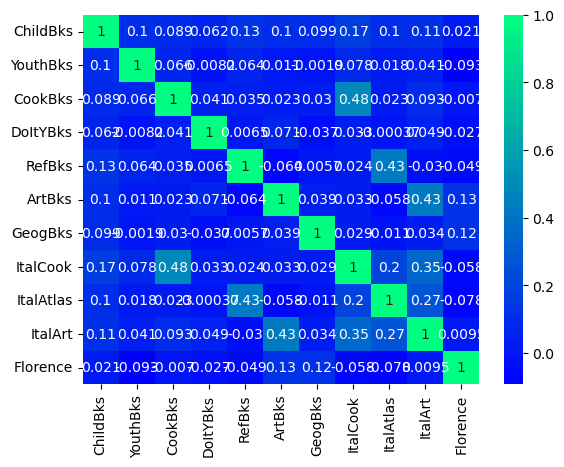

In [23]:
sns.heatmap(book1.corr(), cmap='winter', annot=True)
plt.plot()

In [24]:
book1.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.612500,0.450000,0.681250,0.490625,0.506250,0.556250,0.521875,0.334375,0.159375,0.190625,0.318750
std,0.487942,0.498273,0.466722,0.500695,0.500744,0.497604,0.500304,0.472510,0.366599,0.393409,0.466722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


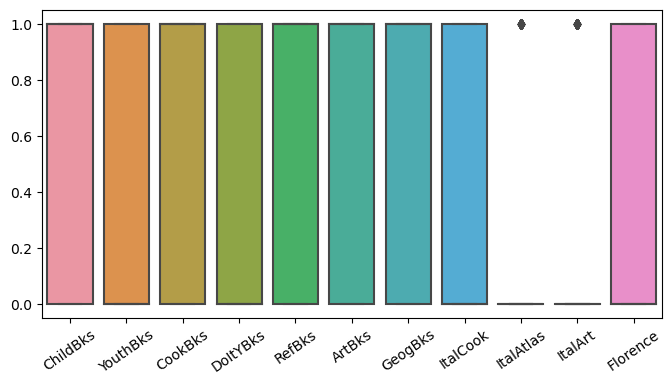

In [30]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data =book1)
plt.xticks(rotation=35)
plt.show()

### creating frequent datasets

In [31]:
from mlxtend.frequent_patterns import apriori

In [33]:
frequent_itemsets = apriori(book1,min_support=0.1,use_colnames=True)
frequent_itemsets

C:\Users\User\Downloads\anacondaa\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
152,0.106250,"(DoItYBks, ArtBks, GeogBks, CookBks)"
153,0.106250,"(DoItYBks, ArtBks, CookBks, ItalCook)"
154,0.103125,"(ArtBks, GeogBks, CookBks, RefBks)"
155,0.112500,"(ArtBks, GeogBks, CookBks, ItalCook)"


### extracting association rule from frequent dataset

In [34]:
from mlxtend.frequent_patterns import association_rules

In [35]:
assoc_rules=association_rules(frequent_itemsets,min_threshold=1.0)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.334375,0.681250,0.334375,1.0,1.467890,0.106582,inf,0.478873
1,(ItalAtlas),(RefBks),0.159375,0.506250,0.159375,1.0,1.975309,0.078691,inf,0.587361
2,(ItalArt),(ArtBks),0.190625,0.556250,0.190625,1.0,1.797753,0.084590,inf,0.548263
3,"(ChildBks, ItalCook)",(CookBks),0.243750,0.681250,0.243750,1.0,1.467890,0.077695,inf,0.421488
4,"(ChildBks, ItalAtlas)",(RefBks),0.115625,0.506250,0.115625,1.0,1.975309,0.057090,inf,0.558304
5,"(ChildBks, ItalArt)",(ArtBks),0.137500,0.556250,0.137500,1.0,1.797753,0.061016,inf,0.514493
6,"(ItalCook, YouthBks)",(CookBks),0.168750,0.681250,0.168750,1.0,1.467890,0.053789,inf,0.383459
7,"(DoItYBks, ItalCook)",(CookBks),0.171875,0.681250,0.171875,1.0,1.467890,0.054785,inf,0.384906
8,"(RefBks, ItalCook)",(CookBks),0.175000,0.681250,0.175000,1.0,1.467890,0.055781,inf,0.386364
9,"(CookBks, ItalAtlas)",(RefBks),0.112500,0.506250,0.112500,1.0,1.975309,0.055547,inf,0.556338


In [36]:
assoc_rules[assoc_rules['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.334375,0.681250,0.334375,1.0,1.467890,0.106582,inf,0.478873
1,(ItalAtlas),(RefBks),0.159375,0.506250,0.159375,1.0,1.975309,0.078691,inf,0.587361
2,(ItalArt),(ArtBks),0.190625,0.556250,0.190625,1.0,1.797753,0.084590,inf,0.548263
3,"(ChildBks, ItalCook)",(CookBks),0.243750,0.681250,0.243750,1.0,1.467890,0.077695,inf,0.421488
4,"(ChildBks, ItalAtlas)",(RefBks),0.115625,0.506250,0.115625,1.0,1.975309,0.057090,inf,0.558304
5,"(ChildBks, ItalArt)",(ArtBks),0.137500,0.556250,0.137500,1.0,1.797753,0.061016,inf,0.514493
6,"(ItalCook, YouthBks)",(CookBks),0.168750,0.681250,0.168750,1.0,1.467890,0.053789,inf,0.383459
7,"(DoItYBks, ItalCook)",(CookBks),0.171875,0.681250,0.171875,1.0,1.467890,0.054785,inf,0.384906
8,"(RefBks, ItalCook)",(CookBks),0.175000,0.681250,0.175000,1.0,1.467890,0.055781,inf,0.386364
9,"(CookBks, ItalAtlas)",(RefBks),0.112500,0.506250,0.112500,1.0,1.975309,0.055547,inf,0.556338


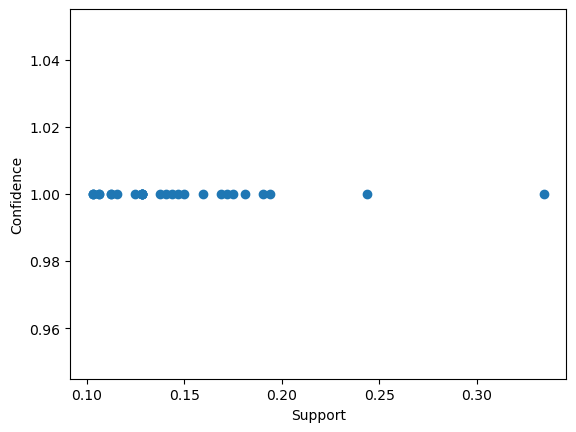

In [37]:
import matplotlib.pyplot as plt
plt.scatter(assoc_rules['support'],assoc_rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


In [38]:
assoc_rules[assoc_rules['lift'] > 2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,"(ItalArt, ItalCook)","(ArtBks, CookBks)",0.128125,0.384375,0.128125,1.0,2.601626,0.078877,inf,0.706093


In [39]:
assoc_rules1=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)

In [40]:
assoc_rules1[assoc_rules1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000,0.209677
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
...,...,...,...,...,...,...,...,...,...,...
949,"(CookBks, ItalCook)","(ArtBks, ItalArt)",0.334375,0.190625,0.128125,0.383178,2.010112,0.064385,1.312169,0.754952
950,(ArtBks),"(ItalArt, CookBks, ItalCook)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801,1.000000
951,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062,0.879367
952,(CookBks),"(ArtBks, ItalArt, ItalCook)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835,1.000000


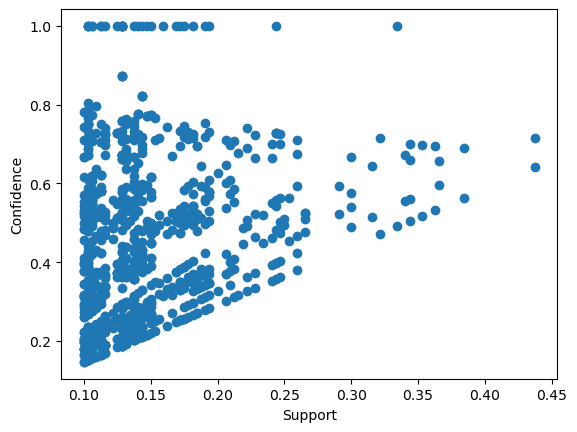

In [41]:
import matplotlib.pyplot as plt
plt.scatter(assoc_rules1['support'],assoc_rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [42]:
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
2,0.681250,(CookBks)
0,0.612500,(ChildBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
4,0.506250,(RefBks)
...,...,...
72,0.100000,"(DoItYBks, ChildBks, Florence)"
149,0.100000,"(ArtBks, CookBks, RefBks, YouthBks)"
146,0.100000,"(DoItYBks, ChildBks, RefBks, ArtBks)"
120,0.100000,"(ArtBks, RefBks, Florence)"


In [43]:

frequent_itemsets1= apriori(book1,min_support=0.2,use_colnames=True)
frequent_itemsets1

C:\Users\User\Downloads\anacondaa\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(ChildBks, YouthBks)"


In [44]:
assoc_rules2=association_rules(frequent_itemsets,metric = 'confidence' ,min_threshold=0.4)
assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000,0.209677
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
...,...,...,...,...,...,...,...,...,...,...
487,"(ArtBks, ItalArt)","(CookBks, ItalCook)",0.190625,0.334375,0.128125,0.672131,2.010112,0.064385,2.030156,0.620868
488,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750,0.964833
489,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625,0.911820
490,"(ItalArt, ItalCook)","(ArtBks, CookBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf,0.706093


In [45]:
assoc_rules2[assoc_rules2['lift']>3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
286,"(ArtBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583,0.882776
288,(ItalArt),"(ArtBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062,0.879367
485,"(ArtBks, CookBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583,0.882776
488,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750,0.964833
489,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625,0.911820
491,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062,0.879367


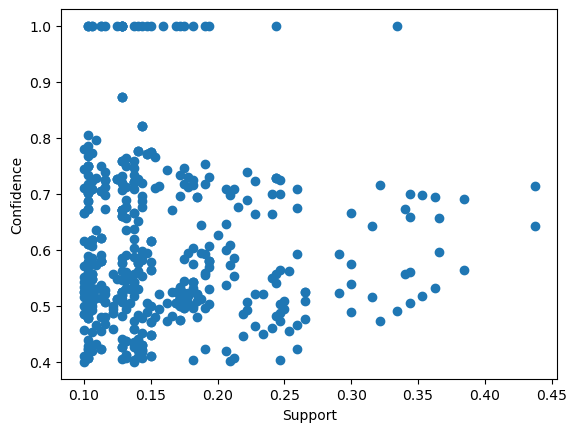

In [47]:
import matplotlib.pyplot as plt
plt.scatter(assoc_rules2['support'],assoc_rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Question 2

In [48]:
movies=pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [49]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [50]:
movies.shape

(10, 15)

In [64]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.428571,0.571429,0.285714,0.285714,0.428571,0.285714,0.142857,0.142857,0.142857,0.285714
std,0.534522,0.534522,0.487950,0.487950,0.534522,0.487950,0.377964,0.377964,0.377964,0.487950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
movies.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [53]:
movies[movies.duplicated()]

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [57]:
movies.drop_duplicates(inplace= True)
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [58]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
Using cached wordcloud-1.9.2-cp311-cp311-win_amd64.whl (151 kB)


In [59]:
 from wordcloud import WordCloud

In [60]:
movie_titles = ['Sixth Sense','Gladiator','LOTR1','Harry Potter1','Patriot','LOTR2','Harry Potter2','LOTR','Braveheart','Green Mile']

C:\Users\User\Downloads\anacondaa\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


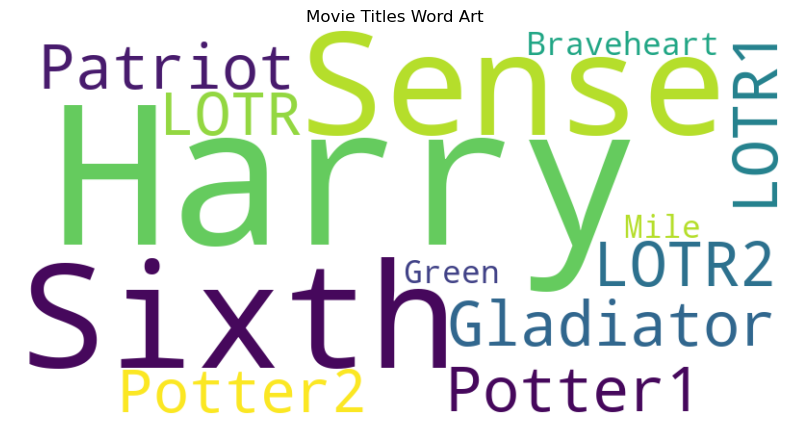

In [61]:

text = ' '.join(movie_titles) # Convert the list to a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movie Titles Word Art")
plt.show()

In [63]:
movies.reset_index(drop=True,inplace=True)
movies.shape

(7, 15)

In [65]:
movies.isnull()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [67]:
movies.isnull().sum()

V1               0
V2               0
V3               3
V4               5
V5               6
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

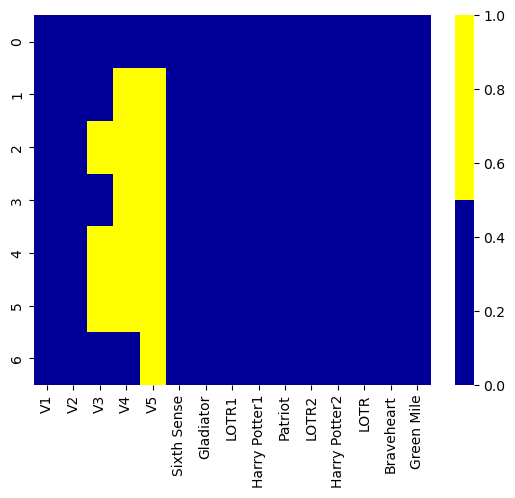

In [68]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(movies.isnull(), cmap=pal)
plt.show()

In [69]:
columns_drop=['V1','V2','V3','V4','V5']

In [70]:
movies.drop(columns=columns_drop,axis=1,inplace=True)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0
5,0,1,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1,0,1


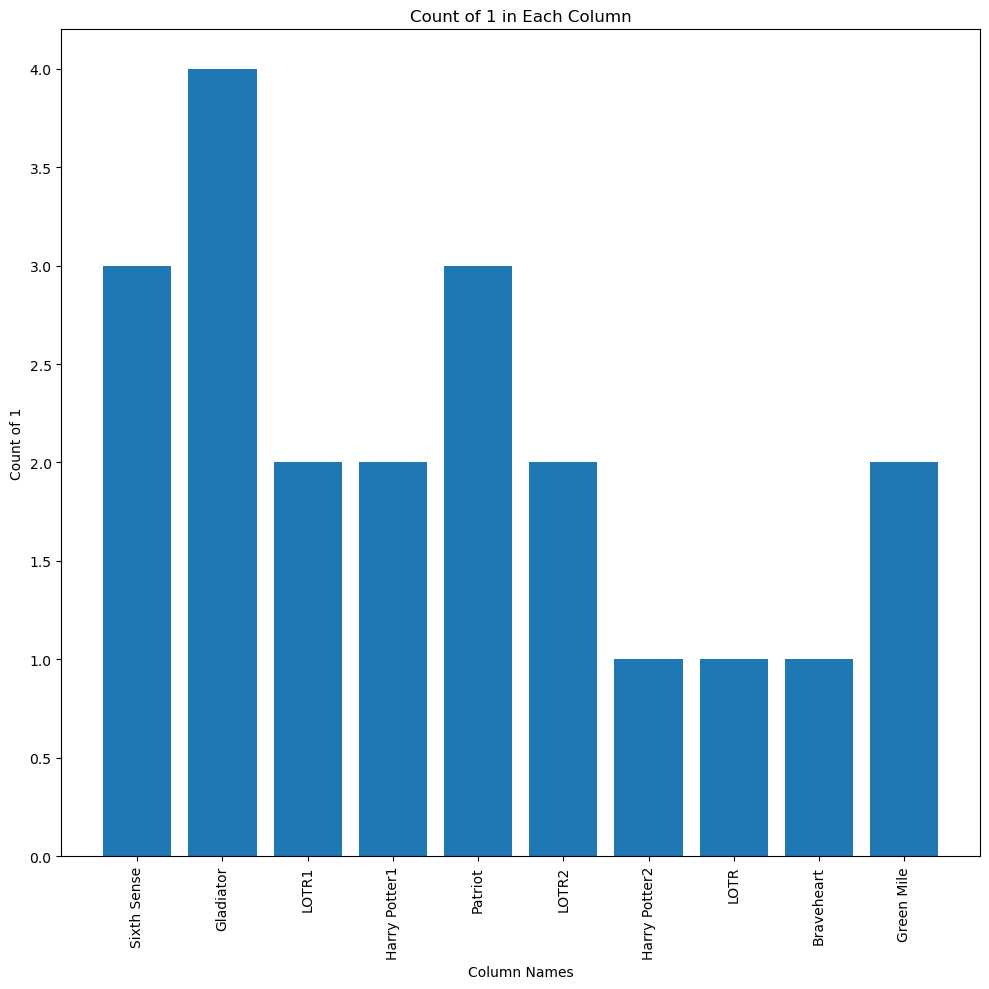

In [72]:
[105]
movie_count = []
col_names = movies.columns
for col_name in col_names:
    count = (movies[col_name] == 1).sum()
    movie_count.append(count)
plt.figure(figsize=(10, 10))
plt.bar(col_names, movie_count)
plt.xlabel('Column Names')
plt.ylabel('Count of 1')
plt.title('Count of 1 in Each Column')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [73]:
freq_moviesets=apriori(movies,min_support=0.1,use_colnames=True)
freq_moviesets

C:\Users\User\Downloads\anacondaa\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [74]:
assoc_rules=association_rules(freq_moviesets,min_threshold=0.5)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
3,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
4,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
...,...,...,...,...,...,...,...,...,...,...
209,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf,1.000000
210,(LOTR1),"(LOTR2, Green Mile, Sixth Sense, Harry Potter1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
211,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
212,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000


In [84]:
assoc_rules1 = association_rules(freq_moviesets, metric="lift", min_threshold=1)
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
2,(Sixth Sense),(LOTR1),0.428571,0.285714,0.142857,0.333333,1.166667,0.020408,1.071429,0.250000
3,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
4,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
...,...,...,...,...,...,...,...,...,...,...
237,(LOTR1),"(LOTR2, Green Mile, Sixth Sense, Harry Potter1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
238,(Sixth Sense),"(LOTR2, Green Mile, Harry Potter1, LOTR1)",0.428571,0.142857,0.142857,0.333333,2.333333,0.081633,1.285714,1.000000
239,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
240,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000


In [85]:
assoc_rules1 = assoc_rules1.sort_values(['confidence', 'lift','support'], ascending =[False, False,False])
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
100,"(Green Mile, Gladiator)",(LOTR),0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.0
101,(LOTR),"(Green Mile, Gladiator)",0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.0
131,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.0
133,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.0
136,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.142857,0.142857,0.142857,1.00,7.00,0.122449,inf,1.0
...,...,...,...,...,...,...,...,...,...,...
39,(Gladiator),"(Patriot, Sixth Sense)",0.571429,0.142857,0.142857,0.25,1.75,0.061224,1.142857,1.0
45,(Gladiator),"(LOTR, Sixth Sense)",0.571429,0.142857,0.142857,0.25,1.75,0.061224,1.142857,1.0
97,(Gladiator),"(Patriot, Braveheart)",0.571429,0.142857,0.142857,0.25,1.75,0.061224,1.142857,1.0
103,(Gladiator),"(LOTR, Green Mile)",0.571429,0.142857,0.142857,0.25,1.75,0.061224,1.142857,1.0


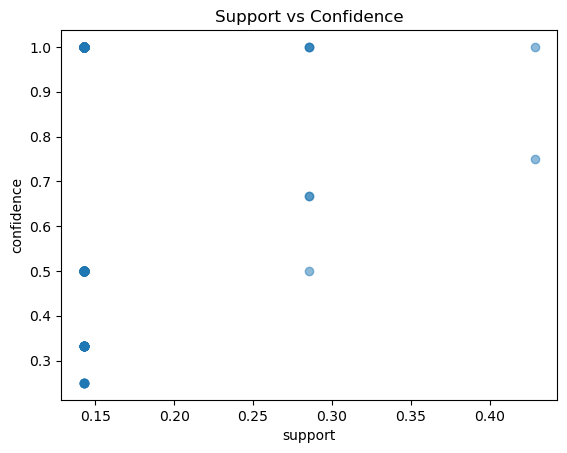

In [86]:
plt.scatter(assoc_rules1['support'], assoc_rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [87]:
assoc_rules2 = association_rules(freq_moviesets, metric="confidence", min_threshold=0.5)
assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
3,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
4,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
...,...,...,...,...,...,...,...,...,...,...
209,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf,1.000000
210,(LOTR1),"(LOTR2, Green Mile, Sixth Sense, Harry Potter1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
211,(LOTR2),"(Harry Potter1, Green Mile, Sixth Sense, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
212,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000


In [88]:
assoc_rules2 = assoc_rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
80,"(Green Mile, Gladiator)",(LOTR),0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
81,(LOTR),"(Green Mile, Gladiator)",0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
110,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
112,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
115,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
4,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.5,1.166667,0.020408,1.142857,0.200000
31,"(Sixth Sense, Gladiator)",(Patriot),0.285714,0.428571,0.142857,0.5,1.166667,0.020408,1.142857,0.200000
46,"(LOTR2, LOTR1)",(Sixth Sense),0.285714,0.428571,0.142857,0.5,1.166667,0.020408,1.142857,0.200000
12,(Green Mile),(Gladiator),0.285714,0.571429,0.142857,0.5,0.875000,-0.020408,0.857143,-0.166667


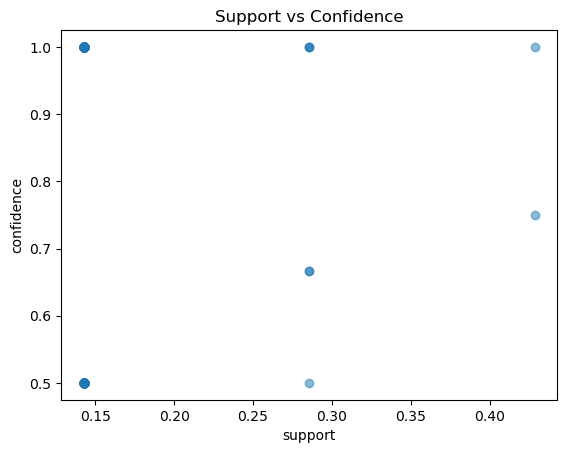

In [89]:
plt.scatter(assoc_rules2['support'], assoc_rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [90]:
frequent_moviesets2 = apriori(movies, min_support=0.2, use_colnames=True)
frequent_moviesets2

C:\Users\User\Downloads\anacondaa\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.285714,(Green Mile)
7,0.285714,"(Sixth Sense, Gladiator)"
8,0.285714,"(Green Mile, Sixth Sense)"
9,0.428571,"(Patriot, Gladiator)"


In [92]:
assoc_rules3 = association_rules(frequent_moviesets2, metric="lift", min_threshold=0.1)
assoc_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
2,(Green Mile),(Sixth Sense),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf,0.800000
3,(Sixth Sense),(Green Mile),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857,1.000000
4,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.000000,1.750000,0.183673,inf,0.750000
5,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.750000,1.750000,0.183673,2.285714,1.000000
6,(LOTR2),(LOTR1),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf,1.000000
7,(LOTR1),(LOTR2),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf,1.000000


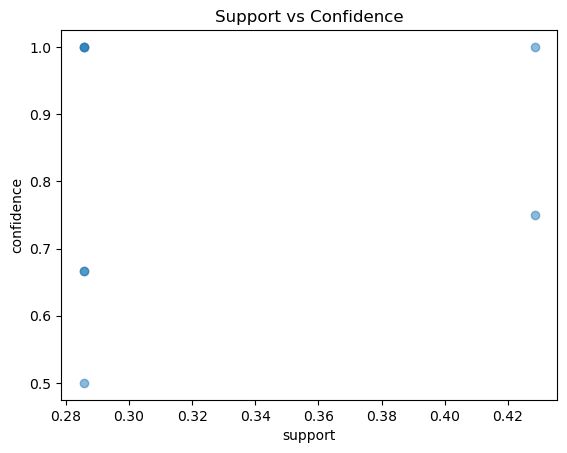

In [93]:
plt.scatter(assoc_rules3['support'], assoc_rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [94]:
assoc_rules4 = association_rules(frequent_moviesets2, metric="confidence", min_threshold=0.5)
assoc_rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
1,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
2,(Green Mile),(Sixth Sense),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf,0.800000
3,(Sixth Sense),(Green Mile),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857,1.000000
4,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.000000,1.750000,0.183673,inf,0.750000
5,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.750000,1.750000,0.183673,2.285714,1.000000
6,(LOTR2),(LOTR1),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf,1.000000
7,(LOTR1),(LOTR2),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf,1.000000
